<a href="https://colab.research.google.com/github/dtermite/PythonColab/blob/main/Capitulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creando nombres

In [1]:
import pandas as pd

In [2]:
nombres_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=M&qtd=200')
nombres_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=F&qtd=200')

In [3]:
print("Cantidad de nombres: " + str(len(nombres_m)+len(nombres_f)))

Cantidad de nombres: 400


In [4]:
frames = [nombres_m, nombres_f]
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],
           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198 

In [5]:
nombres = pd.concat(frames)['nome'].to_frame()
nombres.columns = ['nombre']
nombres.sample(5)

,nombre
82,DAVID
85,HELENA
87,JONAS
199,GEOVANE
15,LETICIA


#Incluyendo id de alumnos|

In [6]:
nombres.sample(5)

,nombre
135,ROSILENE
97,BARBARA
92,DIOGO
8,PATRICIA
35,ALEXANDRE


In [7]:
import numpy as np

In [8]:
#Creo numeros aleatorios con numpy para agregar el id a los registos del dataframe
np.random.seed(123)

In [9]:
total_alumnos = len(nombres)
total_alumnos

400

In [10]:
#creo los id y se los agrego al dataframe
nombres['id_alumno'] = np.random.permutation(total_alumnos) + 1
nombres.sample(5)

,nombre,id_alumno
188,VALDECIR,369
57,IGOR,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


In [11]:
#Creo una lista de dominios
dominios = ['@dominiodeemail.com', '@serviciodeemail.com']

In [12]:
#Agrego aleatoriemente dominios a los alumnos
nombres['dominio'] = np.random.choice(dominios, total_alumnos)
nombres.sample(5)

,nombre,id_alumno,dominio
84,FATIMA,78,@dominiodeemail.com
0,MARIA,331,@serviciodeemail.com
179,LILIANE,340,@dominiodeemail.com
10,LUIS,174,@dominiodeemail.com
171,VALDEMIR,45,@dominiodeemail.com


In [13]:
#Creo el campo email y armo al direccion de email con el nombre y dominio
nombres['email'] =nombres.nombre.str.cat(nombres.dominio).str.lower()
nombres.sample(5)

,nombre,id_alumno,dominio,email
114,ELZA,320,@dominiodeemail.com,elza@dominiodeemail.com
57,IGOR,303,@serviciodeemail.com,igor@serviciodeemail.com
85,FABRICIO,221,@dominiodeemail.com,fabricio@dominiodeemail.com
183,MARLON,8,@dominiodeemail.com,marlon@dominiodeemail.com
189,WESLEI,137,@dominiodeemail.com,weslei@dominiodeemail.com


#Creando Cursos

In [37]:
import html5lib

In [38]:
url = 'http://dsinformatica.dyndns.org/cursos/'

In [39]:
cursos =pd.read_html(url)
cursos

[                 Curso
 0  Introduccion a HTML
 1          Bootstrap 4
 2   JavaScript bÃ¡sico
 3        Java para web
 4          C# para Web
 5     Cursos de Python
 6         Curso de PHP
 7       Curso de React
 8     Curso de Node.JS]

In [40]:
#Al leer de una url lo levanta como una lista, para convertirlo en dataframe se invoca llamndo al primer elemento y se almacena en el mimso dataframe
cursos = cursos[0]
cursos

,Curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web
5,Cursos de Python
6,Curso de PHP
7,Curso de React
8,Curso de Node.JS


In [41]:
cursos.head()

,Curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web


#Adicionando Index

In [42]:
cursos.rename(columns={'Curso' : 'nombre_curso'})

,nombre_curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web
5,Cursos de Python
6,Curso de PHP
7,Curso de React
8,Curso de Node.JS


In [43]:
#renombro columna y la aplico al dataframe
cursos = cursos.rename(columns={'Curso' : 'nombre_curso'})

In [44]:
cursos

,nombre_curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web
5,Cursos de Python
6,Curso de PHP
7,Curso de React
8,Curso de Node.JS


In [45]:
#Agregando un indice a dataframe
cursos['id']= cursos.index + 1
cursos

,nombre_curso,id
0,Introduccion a HTML,1
1,Bootstrap 4,2
2,JavaScript bÃ¡sico,3
3,Java para web,4
4,C# para Web,5
5,Cursos de Python,6
6,Curso de PHP,7
7,Curso de React,8
8,Curso de Node.JS,9


In [46]:
#reemplazo el index con mi columna id
cursos = cursos.set_index('id')
cursos

,nombre_curso
id,
1,Introduccion a HTML
2,Bootstrap 4
3,JavaScript bÃ¡sico
4,Java para web
5,C# para Web
6,Cursos de Python
7,Curso de PHP
8,Curso de React
9,Curso de Node.JS


In [47]:
cursos.shape

(9, 1)

#Matriculando alumnos

In [52]:
nombres['matriculas'] = np.ceil(np.random.exponential(size=total_alumnos)*1.5).astype(int)
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,7
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,1
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,3


In [54]:
nombres.matriculas.describe()

count    400.000000
mean       2.022500
std        1.499204
min        1.000000
25%        1.000000
50%        2.000000
75%        2.250000
max       12.000000
Name: matriculas, dtype: float64

In [55]:
import seaborn as sns

<ipython-input-58-68059771b3aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nombres.matriculas)


<Axes: xlabel='matriculas', ylabel='Density'>

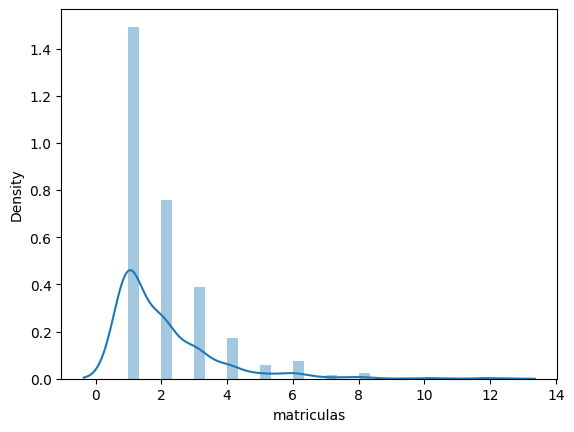

In [58]:
sns.distplot(nombres.matriculas)

In [59]:
nombres.matriculas.value_counts()

1     199
2     101
3      52
4      23
6      10
5       8
8       3
7       2
12      1
10      1
Name: matriculas, dtype: int64

#Seleccionando Alumnos

In [60]:
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,7
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,1
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,3


In [61]:
cursos

,nombre_curso
id,
1,Introduccion a HTML
2,Bootstrap 4
3,JavaScript bÃ¡sico
4,Java para web
5,C# para Web
6,Cursos de Python
7,Curso de PHP
8,Curso de React
9,Curso de Node.JS


In [62]:
todas_matriculas = []
x = np.random.rand(len(cursos))
prob = x / sum(x)
prob

array([0.07238335, 0.16368995, 0.12667429, 0.13403492, 0.0707005 ,
       0.01631168, 0.12939488, 0.16160121, 0.12520921])

In [67]:
#Elejir aleatoreamente los cursos y asignarselo a los alumnos
for index, row in nombres.iterrows():
  id = row.id_alumno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas=pd.DataFrame(todas_matriculas, columns=['id_alumno', 'id_curso'])
matriculas.head()

,id_alumno,id_curso
0,235,7
1,43,7
2,304,1
3,304,2
4,304,7


In [74]:
matriculas_por_curso =matriculas.groupby('id_curso').count().join(cursos['nombre_curso'])[['nombre_curso', 'id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending = False)
matriculas_por_curso

,nombre_curso,Total
id_curso,,
8,Curso de React,280
2,Bootstrap 4,257
7,Curso de PHP,213
9,Curso de Node.JS,195
4,Java para web,194
3,JavaScript bÃ¡sico,193
1,Introduccion a HTML,129
5,C# para Web,126
6,Cursos de Python,31


In [72]:
prob

array([0.07238335, 0.16368995, 0.12667429, 0.13403492, 0.0707005 ,
       0.01631168, 0.12939488, 0.16160121, 0.12520921])

#Salida en diferentes formatos

In [75]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [77]:
matriculas_por_curso.to_json('matriculas_por_curso.json')

In [80]:
matriculas_por_curso.to_html('matriculas_por_curso.html', index = False)